# Haar Cascade Classifiers
Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

A Haar feature is essentially calculations that are performed on adjacent rectangular regions at a specific location in a detection window. The calculation involves summing the pixel intensities in each region and calculating the differences between the sums. Some examples of Haar features:
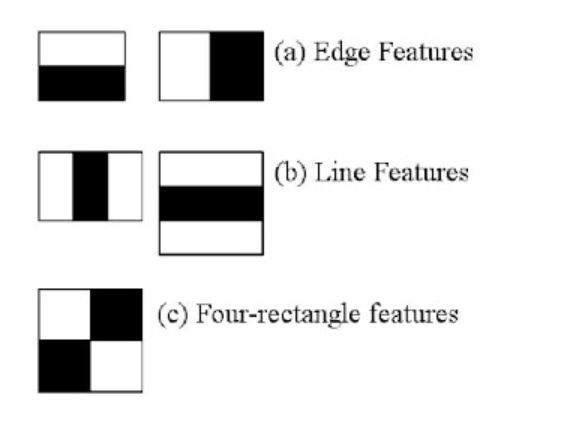


But among all these features we calculated, most of them are irrelevant. For example, consider the image below. The top row shows two good features. The first feature selected seems to focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. The second feature selected relies on the property that the eyes are darker than the bridge of the nose. But the same windows applied to cheeks or any other place is irrelevant. So how do we select the best features out of 160000+ features? It is achieved by Adaboost.


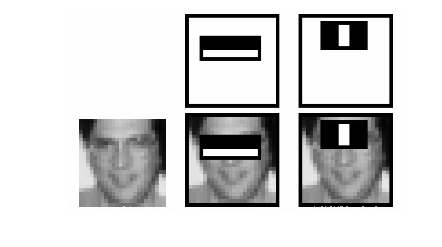


For this, we apply each and every feature on all the training images. For each feature, it finds the best threshold which will classify the faces to positive and negative. Obviously, there will be errors or misclassifications. We select the features with minimum error rate, which means they are the features that most accurately classify the face and non-face images. The final classifier is a weighted sum of these weak classifiers. It is called weak because it alone can't classify the image, but together with others forms a strong classifier.

_source_ : https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html


_source_ : https://medium.com/analytics-vidhya/haar-cascades-explained-38210e57970d

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def show(image = None, title = "Image"):
    size = 16
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

**Face Detection**

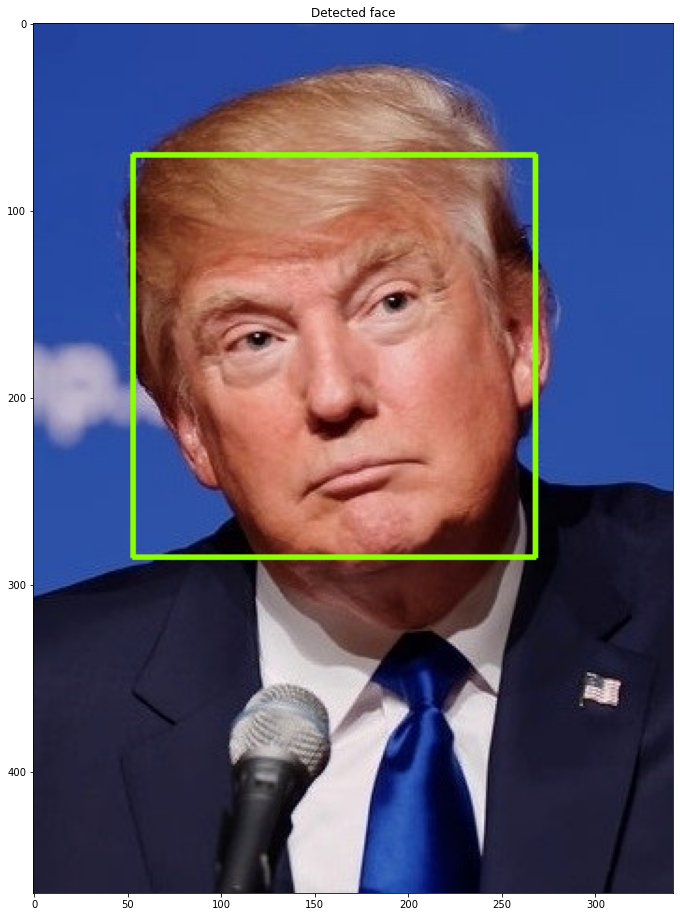

In [4]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades

face_cascade = cv2.CascadeClassifier('Haar/haarcascade_frontalface_default.xml')
image = cv2.imread('images/Trump.jpg')
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #convert to gray

# The classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordinates

faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

#draw a rectangle around the face
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,140),2)
    
    
show(image,"Detected face")

**Eye and Face Detection**

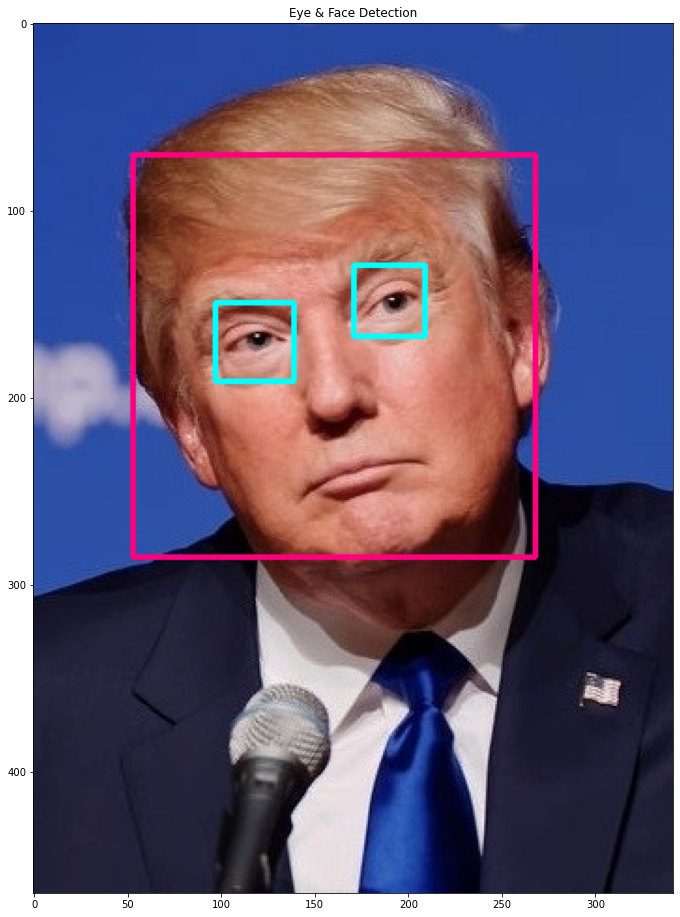

In [18]:
face_cascade = cv2.CascadeClassifier('Haar/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('Haar/haarcascade_eye.xml')

image = cv2.imread('images/Trump.jpg')
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #convert to gray

faces = face_cascade.detectMultiScale(gray_img,1.3,5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

show(img,'Eye & Face Detection')